# Завдання

1. Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv


In [1]:
import pandas as pd

url = 'https://docs.google.com/spreadsheets/d/1bclX5PbqE8zR1-wOSM3ZTFa53sIC7RXqwty7Abmw9yQ/export?format=csv&gid=1724592523'

df = pd.read_csv(url)

2. Прочитайте отриману таблицю, використовуючи метод head


In [2]:
print(df.head(3))

   N              Посада Мова програмування Спеціалізація  \
0  1  Junior QA engineer                NaN     Manual QA   
1  2  Junior QA engineer                NaN     Manual QA   
2  3   Software Engineer            C#/.NET           NaN   

  Загальний досвід роботи Досвід роботи на поточному місці  \
0                     0.5                              0.5   
1         менше 3 місяців                  менше 3 місяців   
2                       4                                1   

   Зарплата на місяць  Зміна зарплати за 12 місяців   Місто   Розмір компанії  \
0                 400                             0  Харків        до 10 осіб   
1                 430                           130  Харків  більше 1000 осіб   
2                2500                           800    Київ      до 1000 осіб   

   ... Ще студент                    Рівень англійської  \
0  ...       True    Pre-intermediate (нище середнього)   
1  ...       True  Upper-Intermediate (вище середнього)   
2  .

3. Визначте розмір таблиці за допомогою методу shape


In [3]:
print(df.shape)

(8704, 25)


4. Визначте типи всіх стовпців за допомогою dataframe.dtypes


In [4]:
print(df.dtypes)

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

5. Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)


In [5]:
print(df.isnull().sum())

N                                      0
Посада                                 0
Мова програмування                  3850
Спеціалізація                       7219
Загальний досвід роботи                0
Досвід роботи на поточному місці       0
Зарплата на місяць                     0
Зміна зарплати за 12 місяців           0
Місто                                  0
Розмір компанії                        0
Тип компанії                           0
Стать                                  0
Вік                                    0
Освіта                                 0
Університет                          358
Ще студент                             0
Рівень англійської                     0
Предметна область                    223
Дата заповнення                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

6. Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"


In [6]:
for column in df.columns:
    if column != 'Мова програмування' and df[column].isnull().any():
        df.drop(column, axis=1, inplace=True)

7. Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"


In [7]:
print(df.isnull().sum())

N                                      0
Посада                                 0
Мова програмування                  3850
Загальний досвід роботи                0
Досвід роботи на поточному місці       0
Зарплата на місяць                     0
Зміна зарплати за 12 місяців           0
Місто                                  0
Розмір компанії                        0
Тип компанії                           0
Стать                                  0
Вік                                    0
Освіта                                 0
Ще студент                             0
Рівень англійської                     0
Дата заповнення                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64


8. Видаліть усі рядки у вихідній таблиці за допомогою методу dropna


In [8]:
df.dropna(inplace=True)

9. Визначте новий розмір таблиці за допомогою методу shape


In [9]:
print(df.shape)

(4854, 20)


10.	Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python


In [10]:
python_data  = df[df['Мова програмування'] == 'Python']

11.	Визначте розмір таблиці python_data за допомогою методу shape


In [11]:
print(python_data.shape)

(207, 20)


12.	Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"


In [12]:
group = python_data.groupby('Посада')

13.	Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"


In [13]:
result = group.agg({'Зарплата на місяць': ['min', 'max']})
print(result)


                         Зарплата на місяць      
                                        min   max
Посада                                           
Junior Software Engineer                100  1250
Senior Software Engineer               1300  9200
Software Engineer                       500  5400
System Architect                       3000  5000
Technical Lead                         1425  6200


14.	Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"


In [14]:
def custom_function(x):
  return x.mean().astype(int)

result['Зарплата на місяць','avg'] = group['Зарплата на місяць'].apply(custom_function)

print(result)



                         Зарплата на місяць            
                                        min   max   avg
Посада                                                 
Junior Software Engineer                100  1250   560
Senior Software Engineer               1300  9200  3387
Software Engineer                       500  5400  1799
System Architect                       3000  5000  4000
Technical Lead                         1425  6200  3165


15.	Створіть описову статистику за допомогою методу describe для нового стовпчика.


In [15]:
describe_result = result['Зарплата на місяць','avg'].describe().to_frame().astype(int)
print(describe_result)

      Зарплата на місяць
                     avg
count                  5
mean                2582
std                 1387
min                  560
25%                 1799
50%                 3165
75%                 3387
max                 4000


16.	Збережіть отриману таблицю в CSV файл


In [16]:
describe_result.to_csv('describe_result.csv', index=False)

# Візуалізація

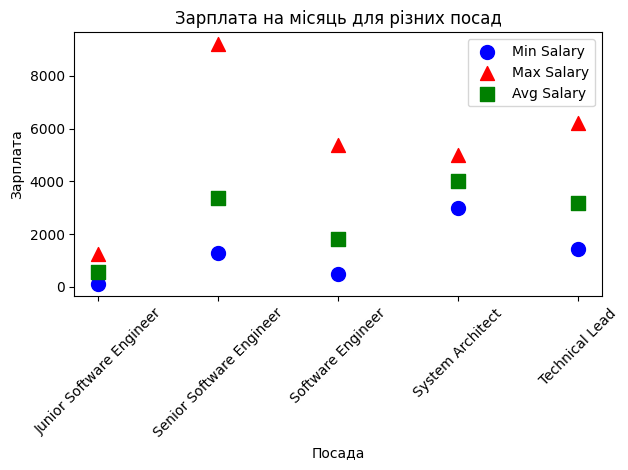

In [17]:
import matplotlib.pyplot as plt

plt.scatter(result.index, result['Зарплата на місяць','min'], color='blue', label='Min Salary', s=100, marker='o')
plt.scatter(result.index, result['Зарплата на місяць','max'], color='red', label='Max Salary', s=100, marker='^')
plt.scatter(result.index, result['Зарплата на місяць','avg'], color='green', label='Avg Salary', s=100, marker='s')

plt.title('Зарплата на місяць для різних посад')
plt.xlabel('Посада')
plt.ylabel('Зарплата')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


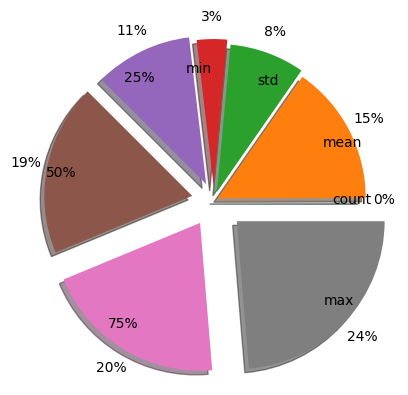

In [18]:
explode=[]
i = 0.0
for _ in describe_result.index:
    explode.append(i)
    i += 0.03

plt.pie(
    describe_result['Зарплата на місяць','avg'],
    labels=describe_result.index,
    shadow=True,
    explode=explode,
    autopct="%.f%%",
    pctdistance=1.15,
    labeldistance=0.8,
)

plt.show()

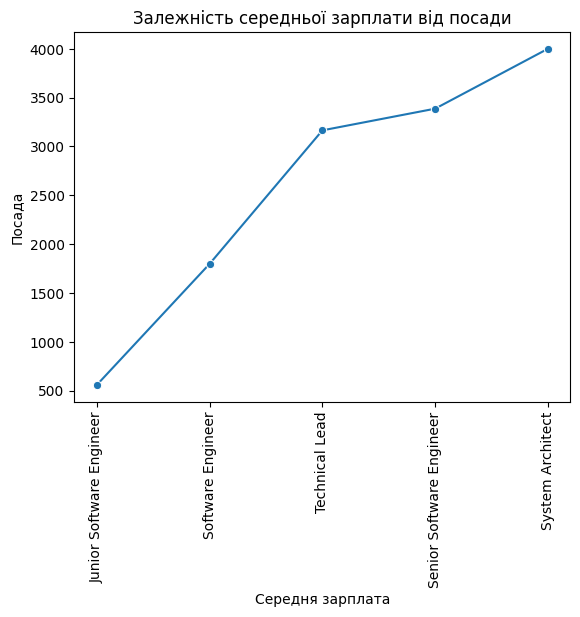

In [26]:
import seaborn as sns
flat_result = result.reset_index()
flat_result.columns = ['Посада', 'min', 'max', 'avg']
sorted_result = flat_result.sort_values(by='avg')

data = {
    'Посада': sorted_result['Посада'],
    'avg': sorted_result['avg']
}
result = pd.DataFrame(data)

sns.lineplot(x='Посада', y='avg', data=result,marker='o')
plt.title('Залежність середньої зарплати від посади')
plt.xlabel('Середня зарплата')
plt.ylabel('Посада')
plt.xticks(rotation=90)
plt.show()